In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)

1.3.5


In [3]:
df=pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = df.drop(['car_ID'],axis=1)

In [6]:
df.shape

(205, 25)

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

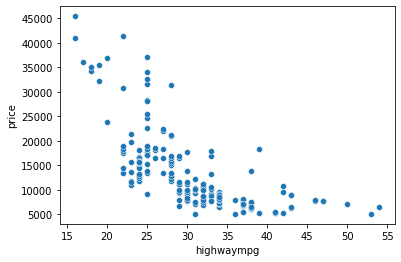

In [9]:
sns.scatterplot(x='highwaympg',y='price',data=df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=df[['price']]

In [12]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [13]:
x=df[['carlength','carwidth','curbweight','enginesize','boreratio','citympg','highwaympg']]

In [14]:
x

,carlength,carwidth,curbweight,enginesize,boreratio,citympg,highwaympg
0,168.8,64.1,2548,130,3.47,21,27
1,168.8,64.1,2548,130,3.47,21,27
2,171.2,65.5,2823,152,2.68,19,26
3,176.6,66.2,2337,109,3.19,24,30
4,176.6,66.4,2824,136,3.19,18,22
...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,3.78,23,28
201,188.8,68.8,3049,141,3.78,19,25
202,188.8,68.9,3012,173,3.58,18,23
203,188.8,68.9,3217,145,3.01,26,27


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
x_train

,carlength,carwidth,curbweight,enginesize,boreratio,citympg,highwaympg
166,168.7,64.0,2300,98,3.24,26,29
152,158.7,63.6,2015,92,3.05,31,38
157,166.3,64.4,2109,98,3.19,30,37
129,175.7,72.3,3366,203,3.94,17,28
3,176.6,66.2,2337,109,3.19,24,30
...,...,...,...,...,...,...,...
90,165.3,63.8,2017,103,2.99,45,50
7,192.7,71.4,2954,136,3.19,19,25
181,187.8,66.5,3151,161,3.27,19,24
36,157.1,63.9,2024,92,2.92,30,34


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(x_test)

In [21]:
y_pred=pd.DataFrame(y_pred)

In [22]:
y_pred.head()

,0
0,10405.409565
1,7355.431619
2,12315.254424
3,6680.079702
4,9933.812245


In [23]:
y_test.head()

,price
37,7895.0
165,9298.0
61,10595.0
24,6229.0
11,16925.0


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
mean_squared_error(y_test,y_pred)

15289725.200387815

In [26]:
r2_score(y_test,y_pred)

0.7819408323853325